<a href="https://colab.research.google.com/github/reinaldi09/Automated_model_selection_tool/blob/main/Automated_Model_Selection_Tool_(OOP_and_ML_practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OOP and simple machine learning projects

Project Idea: Automated Model Selection Tool

Overview:
Create a Python program that automates the process of selecting and training the best-fitting regression model (either linear or polynomial) for a given dataset. The program should implement OOP principles to organize the code into reusable and modular components.

Features:

1. Dataset Loader: Implement a class to load the dataset from a file (e.g., CSV format). This class should preprocess the data, handle missing values, and split it into training and testing sets.

2. Regression Models: Create classes for linear regression and polynomial regression. Each class should encapsulate the model's parameters, such as coefficients for linear regression or degree for polynomial regression. These classes should have methods for training the model using the training data and making predictions.

3. Model Selection: Implement a model selection module that automatically selects the best-fitting regression model based on the dataset's characteristics. You can use criteria such as model performance (e.g., RMSE, R-squared), complexity (e.g., number of parameters), or cross-validation scores to make the selection.

4. Evaluation: Develop a module for evaluating the selected model's performance on the testing dataset. This module should calculate relevant evaluation metrics such as RMSE, R-squared, and visualize the predicted vs. actual values.

5. User Interface: Create a simple command-line interface or graphical user interface (GUI) to interact with the program. The interface should allow users to input the dataset, choose the type of regression model, and display the evaluation results.

Example Workflow:

1. Load the dataset and split it into training and testing sets.
2. Automatically select the best-fitting regression model (linear or polynomial) based on the dataset.
3. Train the selected model using the training data.
4.Evaluate the model's performance on the testing dataset.
5. Display evaluation metrics and visualization of predicted vs. actual values.

*Bonus Features:*

- Implement additional regression algorithms (e.g., Ridge regression, Lasso regression) for comparison.
- Add support for handling categorical variables or feature scaling.
- Extend the project to handle multiple datasets and perform automated model selection across them.

#Generate the dataset

In [1]:
import pandas as pd
import numpy as np

# Generate synthetic dataset for demonstration
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 2 * X.squeeze() + np.random.randn(100)  # Target values with noise

# Create a DataFrame
df = pd.DataFrame({'Feature': X.squeeze(), 'Target': y})

# Save DataFrame to CSV file
df.to_csv('dataset.csv', index=False)

#Load the dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

class DatasetLoader:
    def __init__(self, file_path, test_size=0.3, random_state=42):
        self.file_path = file_path
        self.test_size = test_size
        self.random_state = random_state

    def load_dataset(self):
        dataset = pd.read_csv(self.file_path) # Load dataset from CSV file
        X = dataset.drop(columns=['Target'])
        y = dataset['Target']

        # Split dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        return X_train, X_test, y_train, y_test

# # Instantiate the DatasetLoader class
# loader = DatasetLoader(file_path="/content/dataset.csv")

# # Load the dataset
# X_train, X_test, y_train, y_test = loader.load_dataset()

# # Print the values
# print("X_train:")
# print(X_train)
# print("\nX_test:")
# print(X_test)
# print("\ny_train:")
# print(y_train)
# print("\ny_test:")
# print(y_test)

#Regression Model

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

class RegressionModel:
    def __init__(self):
        pass

    def train(self, X_train, y_train):
        raise NotImplementedError("train() method must be implemented in subclass")

    def predict(self, X):
        raise NotImplementedError("predict() method must be implemented in subclass")

class LinearRegressionModel(RegressionModel):
    def __init__(self):
        super().__init__()
        self.model = LinearRegression()

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X):
        return self.model.predict(X)

class PolynomialRegressionModel(RegressionModel):
    def __init__(self, degree=2):
        super().__init__()
        self.degree = degree
        self.model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X):
        return self.model.predict(X)

In [4]:
from sklearn.metrics import mean_squared_error

class ModelSelector:
    def __init__(self, models):
        self.models = models

    def select_best_model(self, X_train, y_train, X_test, y_test):
        best_model = None
        best_score = float('inf')  # Initialize with a high value for minimization
        for model in self.models:
            model.train(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            if mse < best_score:
                best_model = model
                best_score = mse
        return best_model

In [ ]:
import matplotlib.pyplot as plt

class ModelEvaluator:
    def __init__(self, model):
        self.model = model

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r_squared = self.model.score(X_test, y_test)
        # Additional evaluation metrics can be calculated here
        return mse, r_squared

    def visualize_results(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        plt.scatter(y_test, y_pred)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs. Predicted Values')
        plt.show()

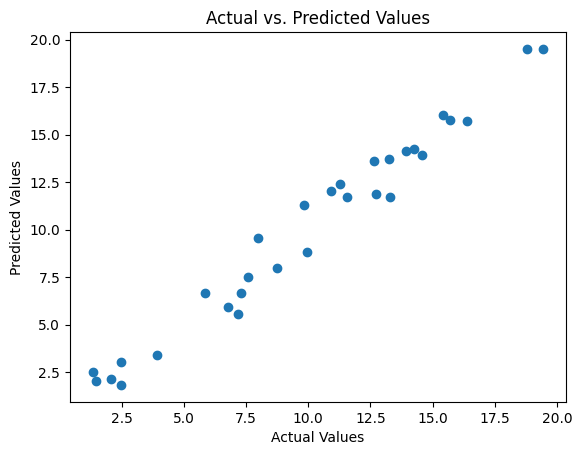

In [ ]:
def main():
    # Example usage
    file_path = 'dataset.csv'
    dataset_loader = DatasetLoader(file_path)
    X_train, X_test, y_train, y_test = dataset_loader.load_dataset()

    linear_regression_model = LinearRegressionModel()
    polynomial_regression_model = PolynomialRegressionModel(degree=2)

    model_selector = ModelSelector([linear_regression_model, polynomial_regression_model])
    best_model = model_selector.select_best_model(X_train, y_train, X_test, y_test)
    print(best_model)

    model_evaluator = ModelEvaluator(best_model)
    # mse, r_squared = model_evaluator.evaluate(X_test, y_test)
    # print(f'MSE: {mse}, R-squared: {r_squared}')

    model_evaluator.visualize_results(X_test, y_test)

if __name__ == "__main__":
    main()